# Дифференцирование

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html#matplotlib.pyplot.axhline
* https://numpy.org/doc/stable/reference/generated/numpy.log1p.html#numpy.log1p
* https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html
* https://en.wikipedia.org/wiki/Finite_difference
* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html
* https://en.wikipedia.org/wiki/Gradient_descent
* https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
* https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29

## Задачи для совместного разбора

1\. Дана функция $f(x) = x^2$. Найдите производную этой функции различными способами

In [1]:
def f(x: float) -> float:
  return x**2

In [2]:
def dfdx(x: float) -> float:
  return 2 * x

In [3]:
f(2), dfdx(2)

(4, 4)

In [4]:
from typing import Callable


def dfdx_finite(f: Callable, x: float, h: float) -> float:
  return (f(x+h) - f(x)) / h

In [5]:
dfdx_finite(f, 2, 1e-5)

4.000010000027032

In [6]:
import torch as th

In [7]:
x = th.tensor(10.0, requires_grad=True)
x

tensor(10., requires_grad=True)

In [8]:
def g(x: th.Tensor) -> th.Tensor:
  return x ** 2

In [9]:
y = g(x)
y

tensor(100., grad_fn=<PowBackward0>)

In [10]:
y.backward()

In [11]:
x.grad # dy/dx

tensor(20.)

In [12]:
type(x)

torch.Tensor

In [13]:
th.tensor

<function torch._VariableFunctionsClass.tensor>

In [14]:
x = th.tensor(10.0, requires_grad=True)
y = f(x)
y.backward()
grad = x.grad

gamma = 0.01
# x = x - gamma * grad
x -= gamma * grad

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [15]:
x = th.tensor([10.0, 20.0, 30.0], requires_grad=True)
y = g(x)
# y = [x1**2, x2**2, x3**2]
y.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

In [16]:
x1, x2, x3 = x
J = th.tensor(
    [[2*x1, 0, 0],
    [0, 2*x2, 0],
    [0, 0, 2*x3],]
)
J

tensor([[20.,  0.,  0.],
        [ 0., 40.,  0.],
        [ 0.,  0., 60.]])

In [17]:
z = th.ones((3, 1))
J @ z

tensor([[20.],
        [40.],
        [60.]])

In [18]:
x = th.tensor([10.0, 20.0, 30.0], requires_grad=True)
y = g(x)
# y = [x1**2, x2**2, x3**2]
y.backward(th.ones((3, )))
x.grad

tensor([20., 40., 60.])

## Задачи для самостоятельного решения

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import torch as th
import sympy as sp
sp.init_printing()
x = sp.symbols('x')

<p class="task" id="1"></p>

1\. Дана функция $f(x)$. Найдите (аналитически) производную данной функции $f'(x)$ и реализуйте две этих функции. Постройте в одной системе координат графики $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [1, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

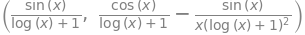

In [16]:
f_x = sp.sin(x) / (sp.log(x) + 1)
df_x = sp.diff(f_x)
f_x, df_x

In [17]:
f = sp.lambdify(x, f_x, "numpy")
f_df = sp.lambdify(x, df_x, "numpy")

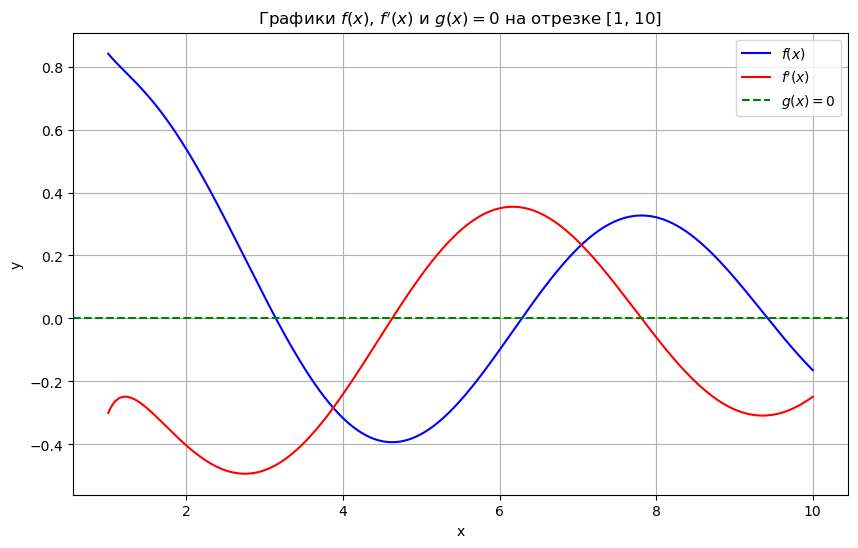

In [18]:
X = np.linspace(1.001, 10, 10000)
plt.figure(figsize=(10, 6))
plt.plot(X, f(X), label='$f(x)$', color='blue')
plt.plot(X, f_df(X), label="$f'(x)$", color='red')
plt.axhline(0, color='green', label='$g(x) = 0$', linestyle='--') 
plt.title("Графики $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [1, 10]")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

<p class="task" id="2"></p>

2\. Дана функция $f(x)$. Найдите (численно) производную данной функции $f'(x)$ на отрезке [1, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

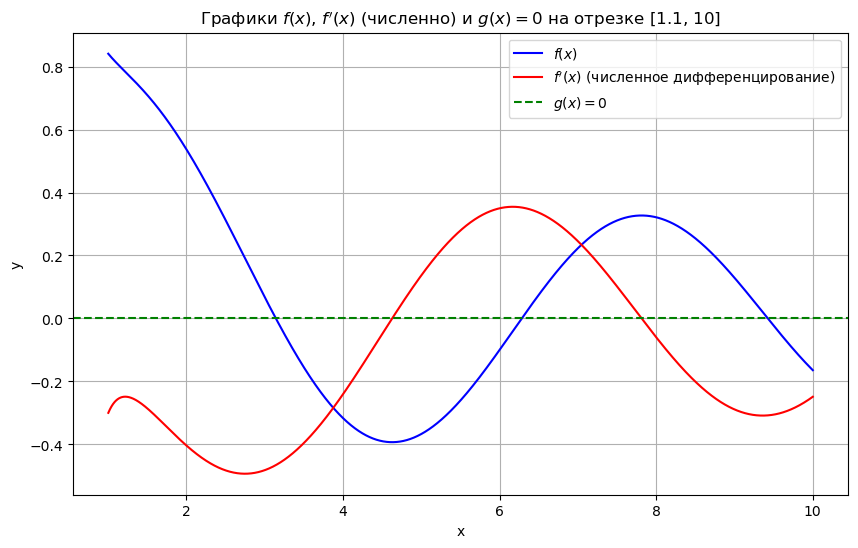

In [19]:
f = lambda x: np.sin(x) / (np.log(x) + 1)
X = np.linspace(1.001, 10, 10000)
y = f(X)
diff = np.array([(y[i] - y[i-1])/(X[i] - X[i-1]) for i in range(1, len(y))])

plt.figure(figsize=(10, 6))
plt.plot(X, f(X), label='$f(x)$', color='blue')
plt.plot(X[1:], diff, label="$f'(x)$ (численное дифференцирование)", color='red')
plt.axhline(0, color='green', label='$g(x) = 0$', linestyle='--') 
plt.title("Графики $f(x)$, $f'(x)$ (численно) и $g(x) = 0$ на отрезке [1.1, 10]")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

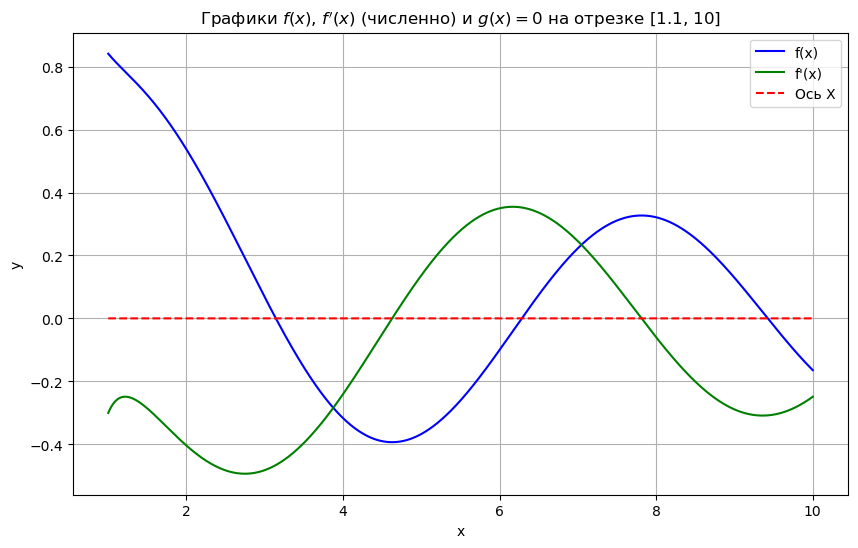

In [20]:
t = th.tensor(X, requires_grad=True)
X = np.linspace(1.001, 10, 10000)
def f(x: th.Tensor) -> th.Tensor:
    return th.sin(x) / (th.log(x) + 1)

y = f(t)
y.backward(gradient=th.ones((t.shape[0],)))

plt.figure(figsize=(10, 6))
plt.plot(X, [float(i) for i in y], color='b', label='f(x)')
plt.plot(X, [float(i) for i in t.grad], color='g', label='f\'(x)')
plt.plot(X, [0 for _ in X], color='r', label='Ось X', linestyle='--')
plt.title("Графики $f(x)$, $f'(x)$ (численно) и $g(x) = 0$ на отрезке [1.1, 10]")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

<p class="task" id="3"></p>

3\. Найдите локальный минимум функции $f(x)$ при помощи метода градиентного спуска. В качестве начальной точки используйте $x_0 = 4$. Найдите локальный максимум этой же функции, используя в качестве начальной точки $x_0'=9$.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

In [21]:
def f(x):
    return th.sin(x) / (th.log(x) + 1)

def gradient_descent_minimize(f, x_init, lr=0.01, epochs=1000):
    x = th.tensor(x_init, dtype=th.float32, requires_grad=True)  
    optimizer = th.optim.SGD([x], lr=lr)      
    for epoch in range(epochs):
        optimizer.zero_grad()  
        y = f(x)               
        y.backward()          
        optimizer.step()       
    return x.item()                 

gradient_descent_minimize(f, x_init=4, lr=0.01, epochs=1000)

In [22]:
def gradient_descent_maximize(f, x_init, lr=0.01, epochs=1000):
    x = th.tensor(x_init, dtype=th.float32, requires_grad=True)
    optimizer = th.optim.SGD([x], lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        y = -f(x) 
        y.backward()
        optimizer.step()
    return x.item()

gradient_descent_maximize(f, x_init=9, lr=0.01, epochs=1000)

<p class="task" id="4"></p>

4\. Дана функция $f(x)$. Найдите (используя возможности по автоматическому дифференцированию пакета `torch`) производную данной функции $f'(x)$ на отрезке [0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на полуинтервале (0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

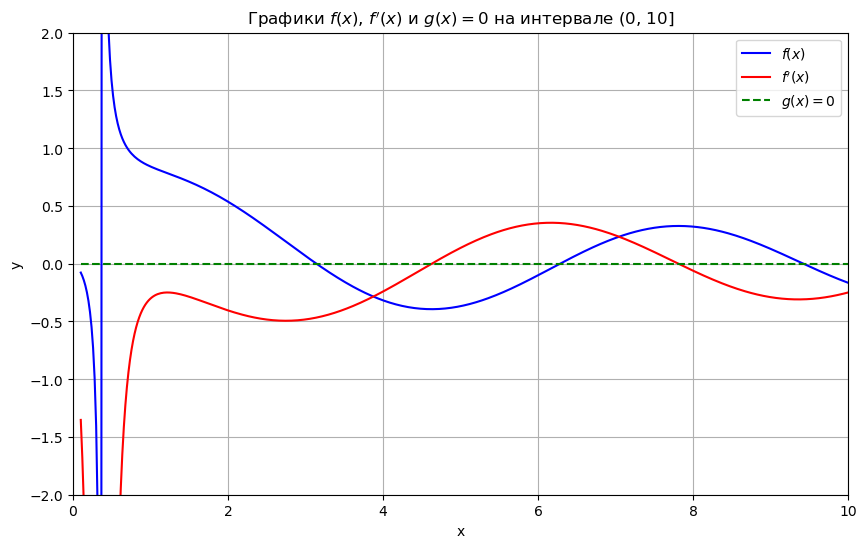

In [29]:
def f(x):
    return th.sin(x) / (th.log(x) + 1)

x_values = th.linspace(0.1, 10, 500, dtype=th.float32, requires_grad=True)
f_values = f(x_values)
f_values.sum().backward()  
f_prime_values_np = x_values.grad.numpy()
f_values_np = f_values.detach().numpy()
x_values_np = x_values.detach().numpy()

plt.figure(figsize=(10, 6))
plt.plot(x_values_np, f_values_np, label='$f(x)$', color='blue')
plt.plot(x_values_np, f_prime_values_np, label="$f'(x)$", color='red')
plt.plot(x_values_np, np.zeros_like(x_values_np), label='$g(x) = 0$', color='green', linestyle='--')
plt.title("Графики $f(x)$, $f'(x)$ и $g(x)=0$ на интервале (0, 10]")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)  
plt.xlim(0, 10)
plt.ylim(-2, 2) 
plt.show()

<p class="task" id="5"></p>

5\. Дана функция $f(x)$. Найдите производную данной функции $f'(x)$ на отрезке [0, 10] при помощи формулы производной сложной функции. На этом же отрезке найдите, используя возможности по автоматическому дифференцированию пакета `torch`. Сравните результаты.

$$f(x) = sin(cos(x))$$

- [ ] Проверено на семинаре

In [31]:
def g(x: th.Tensor) -> th.Tensor:
    return th.cos(x)

def h(x: th.Tensor) -> th.Tensor:
    return th.sin(x)

def dfdg(x: th.Tensor) -> th.Tensor:
    return th.cos(g(x))

def dgdx(x: th.Tensor) -> th.Tensor:
    return -th.sin(x)

def dfdx(x: th.Tensor) -> th.Tensor:
    return dfdg(x) * dgdx(x)

x_values = th.linspace(0, 10, 500)
manual_derivative = dfdx(x_values).detach().numpy()

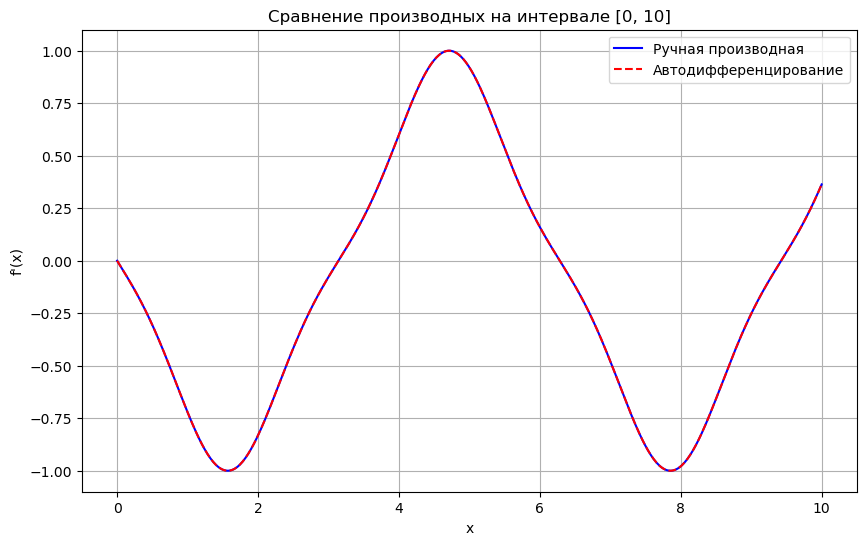

In [33]:
x_values_autograd = x_values.clone().detach().requires_grad_(True)
f_values_autograd = h(g(x_values_autograd))  
f_values_autograd.sum().backward()  
autograd_derivative = x_values_autograd.grad.numpy() 
x_values_np = x_values.detach().numpy()

plt.figure(figsize=(10, 6))
plt.plot(x_values_np, manual_derivative, label='Ручная производная', color='blue')
plt.plot(x_values_np, autograd_derivative, label='Автодифференцирование', color='red', linestyle='--')
plt.title("Сравнение производных на интервале [0, 10]")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.show()